In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Obtención y limpieza de los datos

### Importación de los datos

In [3]:
# Importamos los datos a un DataFrame
file = './data/bertavivesm.20221129144401885.data.csv'
df = pd.read_csv(file, delimiter=';', low_memory=False)

In [4]:
df

,#time,R1_WNAC/WdSpd.Mean,R1_WNAC/WdSpd.Stddev,R1_WNAC/WdSpd.Min,R1_WNAC/WdSpd.Max,R1_WNAC/WdSpd.NVal,R1_WNAC/WdSpd.Flag,R1_WNAC/WdSpd.Detailed_Flag,R1_WNAC/WdSpd.A4,R1_WNAC/WdSpd.A3,...,R1_WTRF/TrfGriPf.Min,R1_WTRF/TrfGriPf.Max,R1_WTRF/TrfGriPf.NVal,R1_WTRF/TrfGriPf.Flag,R1_WTRF/TrfGriPf.Detailed_Flag,R1_WTRF/TrfGriPf.A4,R1_WTRF/TrfGriPf.A3,R1_WTRF/TrfGriPf.A2,R1_WTRF/TrfGriPf.A1,R1_WTRF/TrfGriPf.A0
0,2012-11-20 00:00:00,14.90,nan,14.9,14.9,0,0,0,0.0,0.0,...,-0.9946,-0.9946,0,0,0,0.0,0.0,0.0,1.0,0.0
1,2012-11-20 00:01:00,14.90,nan,14.9,14.9,0,0,0,0.0,0.0,...,-0.9946,-0.9946,0,0,0,0.0,0.0,0.0,1.0,0.0
2,2012-11-20 00:02:00,14.70,nan,14.0,14.9,0,0,0,0.0,0.0,...,-0.9946,-0.9932,0,0,0,0.0,0.0,0.0,1.0,0.0
3,2012-11-20 00:03:00,14.30,nan,13.0,15.6,0,0,0,0.0,0.0,...,-0.9973,-0.9932,0,0,0,0.0,0.0,0.0,1.0,0.0
4,2012-11-20 00:04:00,13.45,nan,12.3,13.8,0,0,0,0.0,0.0,...,-0.9971,-0.9936,0,0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230753,2017-11-20 23:55:00,2.95,nan,2.5,3.0,0,0,0,0.0,0.0,...,0.3216,0.3995,0,0,0,0.0,0.0,0.0,1.0,0.0
5230754,2017-11-20 23:56:00,2.45,nan,1.8,3.3,0,0,0,0.0,0.0,...,0.3216,0.6023,0,0,0,0.0,0.0,0.0,1.0,0.0
5230755,2017-11-20 23:57:00,1.80,nan,1.8,1.8,0,0,0,0.0,0.0,...,0.6023,0.6023,0,0,0,0.0,0.0,0.0,1.0,0.0
5230756,2017-11-20 23:58:00,2.70,nan,1.8,3.3,0,0,0,0.0,0.0,...,0.2672,0.6023,0,0,0,0.0,0.0,0.0,1.0,0.0


### Limpieza de datos

In [6]:
# Seleccionamos las columnas que nos interesan
data = df[['#time',' R1_WNAC/WdSpd.Mean',' R1_WNAC/WdDir.Mean',' R1_WTRF/TrfGriW.Mean']]

In [24]:
# Column names are changed to make the dataframe more understandable.
data.columns = ['time','WindSpeed','WindDirection','Power']

In [25]:
data

,time,WindSpeed,WindDirection,Power
0,2012-11-20 00:00:00,14.90,201.80,5.166350
1,2012-11-20 00:01:00,14.90,201.80,5.154180
2,2012-11-20 00:02:00,14.70,204.10,5.136520
3,2012-11-20 00:03:00,14.30,208.50,5.021540
4,2012-11-20 00:04:00,13.45,209.65,5.094510
...,...,...,...,...
5230753,2017-11-20 23:55:00,2.95,120.45,-0.063793
5230754,2017-11-20 23:56:00,2.45,112.95,-0.092756
5230755,2017-11-20 23:57:00,1.80,107.30,-0.106760
5230756,2017-11-20 23:58:00,2.70,120.00,-0.076840


### Eliminación de outliers

## Información basica de los datos

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5230758 entries, 0 to 5230757
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           object 
 1   WindSpeed      float64
 2   WindDirection  float64
 3   Power          float64
dtypes: float64(3), object(1)
memory usage: 159.6+ MB


In [27]:
data.describe()

,WindSpeed,WindDirection,Power
count,5.230758e+06,5.230758e+06,5.230758e+06
mean,6.635825e+04,5.605512e+04,1.507089e+04
std,2.488902e+05,2.296364e+05,1.218253e+05
min,8.000000e-01,0.000000e+00,-1.682530e-01
25%,5.750000e+00,1.293000e+02,2.820310e-01
50%,9.000000e+00,2.086500e+02,1.980450e+00
75%,1.300000e+01,2.698500e+02,5.055020e+00
max,9.999993e+05,9.999993e+05,9.999993e+05


/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_22573/4277230119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


<AxesSubplot: >

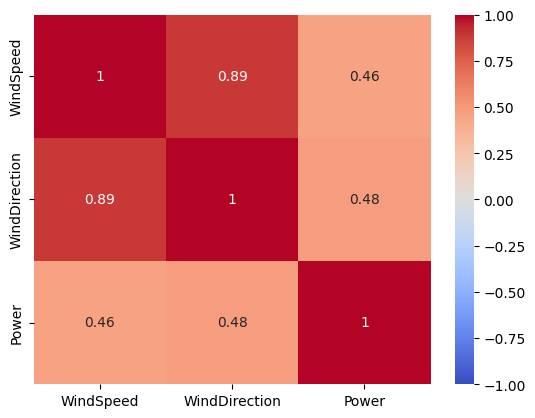

In [28]:
sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

## Descripción estadística de los datos

Las funciones que se utilizarán para determinar las medidas de tendencia central y variabilidad de cada una de las columnas son las siguientes.

In [17]:
# MEDIDAS DE TENDENCIA CENTRAL
def med_tend_central(valores):
    media = np.mean(valores)
    mediana = np.median(valores)
    print(f'MEDIDAS DE TENCENCIA CENTRAL:\nMedia = {media}\nMediana = {mediana}')

# MEDIDAS DE VARIABILIDAD
def med_var(valores):
    desvest = np.std(valores) 
    percentil25 = np.percentile(valores, 25)
    percentil75 = np.percentile(valores, 75)
    print(f'MEDIDAS DE VARIABILIDAD:\nDesviación estándar = {desvest}\nRango intercuatílico = {percentil75-percentil25}')

### Velocidad del viento [m/s]

In [18]:
med_tend_central(data.WindSpeed)
med_var(data.WindSpeed)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 66358.25319694524
Mediana = 9.0
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 248890.22109730335
Rango intercuatílico = 7.25


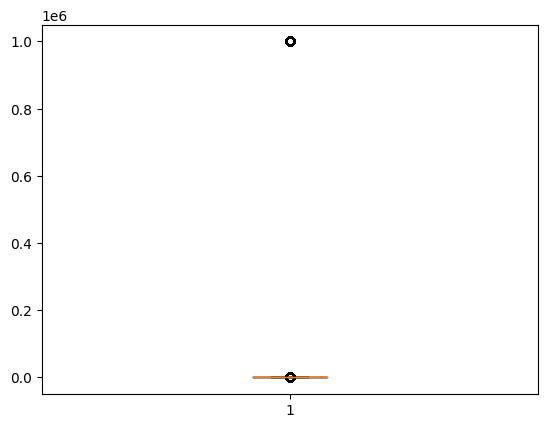

In [19]:
plt.boxplot(data.WindSpeed)
plt.show()

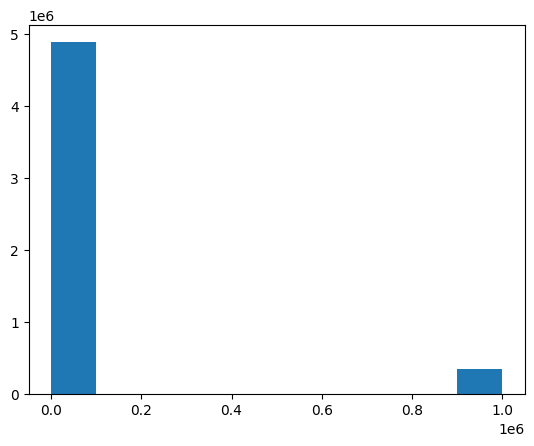

In [23]:
plt.hist(data.WindSpeed)
plt.show()

### Dirección del viento [degº]

In [30]:
med_tend_central(data.WindDirection)
med_var(data.WindDirection)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 56055.11521265697
Mediana = 208.65
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 229636.38034461814
Rango intercuatílico = 140.55


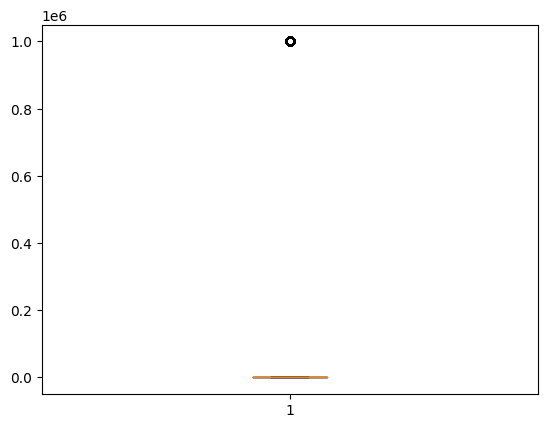

In [32]:
plt.boxplot(data.WindDirection)
plt.show()

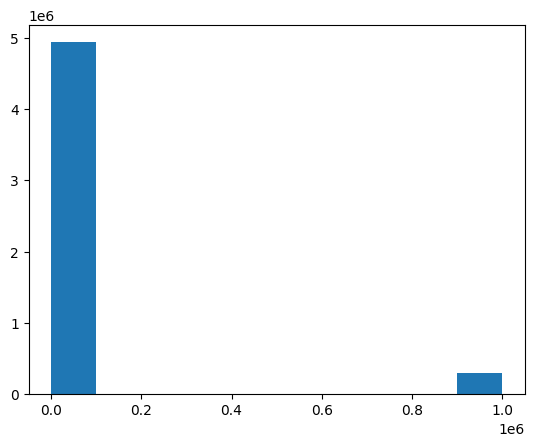

In [33]:
plt.hist(data.WindDirection)
plt.show()

### Potencia [MW]

In [34]:
med_tend_central(data.Power)
med_var(data.Power)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 15070.887685161202
Mediana = 1.98045
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 121825.32584630996
Rango intercuatílico = 4.772989


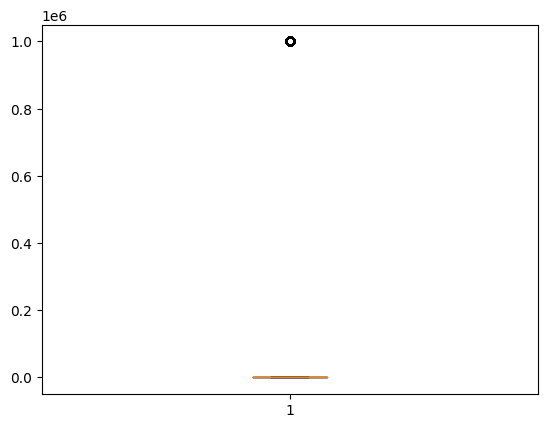

In [38]:
plt.boxplot(data.Power)
plt.show()

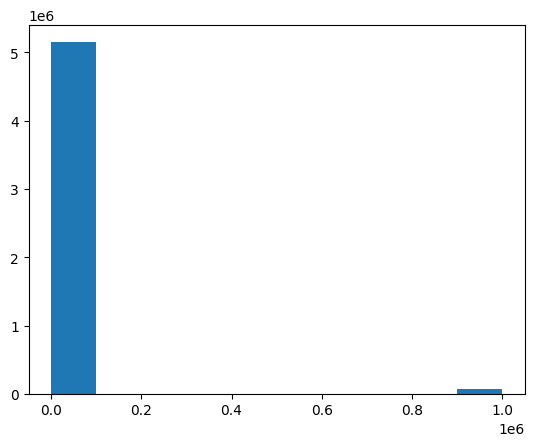

In [37]:
plt.hist(data.Power)
plt.show()

## Análisis bivariado

### Velocidad del viento VS Potencia

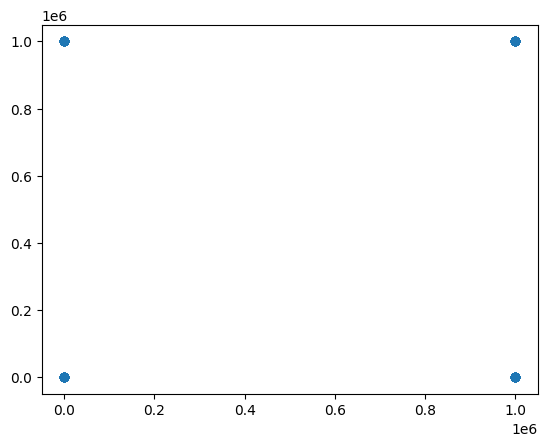

In [42]:
plt.scatter(data.WindSpeed, data.Power)